<a href="https://colab.research.google.com/github/Kalashshetty/ASD_Prediction-using-Machine-learning-techniques/blob/main/Research_Project_Autism_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning approaches for early detection autism spectrum disorder

---



---



---



# Group no. G423
**Dataset Information:**

**Dataset Name:** Toddler Autism dataset July 2018 Acquired from Kaggle

Dataset contains 1054 columns and parameters are based on questions which try to indicate autism symptons on a spectrum for autism disorder.

We tried to acquire Local data from Pediatricians and Neurologists but they had Little to No Data because Indian Parents try to hide their kids' behaviour and shame their speech problems by treating them to speech therapy and just not pursuing it further.

**Our Future Scope**: We will try to Acquire Data from parents of this college of their Infants or Kids below age 12 to detect autism disorder early using the same parameters we used in this dataset for creating symmetry between our recent findings based on ethnicities outside of Indian Sub Continent

# Implementation

## SVM with Feature Selection

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE

# Load the dataset
file_path = '/content/Toddler Autism dataset July 2018.csv'
toddler_autism_df = pd.read_csv(file_path)

# Preprocessing
label_encoder = LabelEncoder()
toddler_autism_df['Class/ASD Traits '] = label_encoder.fit_transform(toddler_autism_df['Class/ASD Traits '])

# Features and target for SVM
X_classification = toddler_autism_df[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons']]
y_classification = toddler_autism_df['Class/ASD Traits ']

# Feature selection
svm = SVC(kernel="linear")
rfe = RFE(estimator=svm, n_features_to_select=5, step=1)
rfe.fit(X_classification, y_classification)

# Transforming data to the selected features
X_classification_selected = rfe.transform(X_classification)

# Train-test split
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification_selected, y_classification, test_size=0.2, random_state=42)

# SVM model
svm_model = SVC()
svm_model.fit(X_train_class, y_train_class)

# SVM Predictions
y_pred_svm = svm_model.predict(X_test_class)

# SVM Accuracy
svm_accuracy = accuracy_score(y_test_class, y_pred_svm)
print(f'SVM Accuracy with Feature Selection: {svm_accuracy}')


SVM Accuracy with Feature Selection: 0.9289099526066351


### SVM with Feature Selection
In the SVM model, you've applied Recursive Feature Elimination (RFE) to select the most important features before training the SVM classifier.

**Original Features Used for SVM with RFE:**

A1: Indicates whether the toddler "Doesn't look at you when you call his/her name."
A2: Indicates whether the toddler "Cannot do things such as stacking blocks or sorting shapes."
A3: Indicates whether the toddler "Is hyperactive all the time."
A4: Indicates whether the toddler "Walks on his/her toes."
A5: Indicates whether the toddler "Doesn't respond when you speak to him/her."
A6: Indicates whether the toddler "Is interested in looking at people's faces."
A7: Indicates whether the toddler "Gets upset by small changes."
A8: Indicates whether the toddler "Uses gestures such as pointing or showing things to communicate."
A9: Indicates whether the toddler "Looks at what you are pointing at."
A10: Indicates whether the toddler "Plays pretend games such as caring for dolls or cooking."
Age_Mons: Represents the age of the toddler in months.

**Features Selected by RFE:**

After applying RFE, the algorithm selected the top 5 features out of the 11 original features. The specific features chosen by RFE are not directly visible in the code snippet, but RFE works by recursively removing the least important feature and re-fitting the model until the desired number of features is reached.

**Example (Hypothetical) Selected Features:**

A2: Cannot do things such as stacking blocks or sorting shapes.
A5: Doesn't respond when you speak to him/her.
A7: Gets upset by small changes.
A8: Uses gestures such as pointing or showing things to communicate.
A10: Plays pretend games such as caring for dolls or cooking.

These selected features were then used to train the SVM model.

## SVM with Feature Selection with Under and Over Fitting Check

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE

# Load the dataset
file_path = '/content/Toddler Autism dataset July 2018.csv'
toddler_autism_df = pd.read_csv(file_path)

# Preprocessing
label_encoder = LabelEncoder()
toddler_autism_df['Class/ASD Traits '] = label_encoder.fit_transform(toddler_autism_df['Class/ASD Traits '])

# Features and target for SVM
X_classification = toddler_autism_df[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons']]
y_classification = toddler_autism_df['Class/ASD Traits ']

# Feature selection
svm = SVC(kernel="linear")
rfe = RFE(estimator=svm, n_features_to_select=5, step=1)
rfe.fit(X_classification, y_classification)

# Transforming data to the selected features
X_classification_selected = rfe.transform(X_classification)

# Train-test split
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification_selected, y_classification, test_size=0.2, random_state=42)

# SVM model
svm_model = SVC()
svm_model.fit(X_train_class, y_train_class)

# SVM Predictions
y_pred_svm_train = svm_model.predict(X_train_class)
y_pred_svm_test = svm_model.predict(X_test_class)

# SVM Accuracy
svm_accuracy_train = accuracy_score(y_train_class, y_pred_svm_train)
svm_accuracy_test = accuracy_score(y_test_class, y_pred_svm_test)

print(f'SVM Accuracy on Training Data: {svm_accuracy_train}')
print(f'SVM Accuracy on Testing Data: {svm_accuracy_test}')

# Check for underfitting or overfitting
if svm_accuracy_train > svm_accuracy_test:
    if svm_accuracy_train - svm_accuracy_test > 0.1:  # Threshold for overfitting can be adjusted
        print("The model is likely overfitting.")
    else:
        print("The model has a slight variance between training and testing, which is normal.")
else:
    if svm_accuracy_train < 0.7 and svm_accuracy_test < 0.7:  # Threshold for underfitting can be adjusted
        print("The model is likely underfitting.")
    else:
        print("The model performs well on both training and testing data.")


SVM Accuracy on Training Data: 0.9122182680901542
SVM Accuracy on Testing Data: 0.9289099526066351
The model performs well on both training and testing data.


## K-Fold Cross Validation Accuracy Check for SVM with Feature Selection

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE

# Load the dataset
file_path = '/content/Toddler Autism dataset July 2018.csv'
toddler_autism_df = pd.read_csv(file_path)

# Preprocessing
label_encoder = LabelEncoder()
toddler_autism_df['Class/ASD Traits '] = label_encoder.fit_transform(toddler_autism_df['Class/ASD Traits '])

# Features and target for SVM
X_classification = toddler_autism_df[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons']]
y_classification = toddler_autism_df['Class/ASD Traits ']

# Feature selection
svm = SVC(kernel="linear")
rfe = RFE(estimator=svm, n_features_to_select=5, step=1)
rfe.fit(X_classification, y_classification)

# Transforming data to the selected features
X_classification_selected = rfe.transform(X_classification)

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
svm_model = SVC()
scores = cross_val_score(svm_model, X_classification_selected, y_classification, cv=kf)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:")
print(scores)

# Print the mean accuracy
print(f"Mean Accuracy: {scores.mean()}")

Accuracy scores for each fold:
[0.92890995 0.91469194 0.89099526 0.90995261 0.90952381]
Mean Accuracy: 0.910814714511397


1. Import KFold and cross_val_score from sklearn.model_selection.
2. Create a KFold object with n_splits=5 to perform 5-fold cross-validation.
3. Set shuffle=True and random_state=42 for reproducibility.
4. Create an instance of the SVM model (svm_model = SVC()).
5. Use cross_val_score to perform the cross-validation. Pass the model, the selected features (X_classification_selected), the target variable (y_classification), and the cv parameter set to the KFold object.
6. The cross_val_score function will return an array of accuracy scores for each fold.
7. Print the accuracy scores for each fold using print(scores).
8. Calculate and print the mean accuracy using print(f"Mean Accuracy: {scores.mean()}").

When you run this modified code, it will perform 5-fold cross-validation on the SVM model with the selected features. The accuracy scores for each fold will be printed, followed by the mean accuracy across all folds.
The mean accuracy obtained through cross-validation provides a more robust estimate of the model's performance compared to a single train-test split. It helps to assess how well the model generalizes to unseen data.

## Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, mean_squared_error

file_path = '/content/Toddler Autism dataset July 2018.csv'
# Reload the dataset
toddler_autism_df = pd.read_csv(file_path)

# Preprocessing
label_encoder = LabelEncoder()
toddler_autism_df['Class/ASD Traits '] = label_encoder.fit_transform(toddler_autism_df['Class/ASD Traits '])

# Features and target for SVM and Naive Bayes
X_classification = toddler_autism_df[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons']]
y_classification = toddler_autism_df['Class/ASD Traits ']

# Train-test split for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# SVM model
svm_model = SVC()
svm_model.fit(X_train_class, y_train_class)

# SVM Predictions
y_pred_svm = svm_model.predict(X_test_class)

# SVM Accuracy
svm_accuracy = accuracy_score(y_test_class, y_pred_svm)

# Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_class, y_train_class)

# Naive Bayes Predictions
y_pred_nb = nb_model.predict(X_test_class)

# Naive Bayes Accuracy
nb_accuracy = accuracy_score(y_test_class, y_pred_nb)

# Features and target for Linear Regression
X_regression = toddler_autism_df[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons']]
y_regression = toddler_autism_df['Qchat-10-Score']

# Train-test split for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

# Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_reg, y_train_reg)

# Linear Regression Predictions
y_pred_linear = linear_model.predict(X_test_reg)

# Linear Regression Mean Squared Error
linear_mse = mean_squared_error(y_test_reg, y_pred_linear)

svm_accuracy, nb_accuracy, linear_mse


from sklearn.naive_bayes import GaussianNB

# Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_class, y_train_class)

# Naive Bayes Predictions
y_pred_nb = nb_model.predict(X_test_class)

# Naive Bayes Accuracy
nb_accuracy = accuracy_score(y_test_class, y_pred_nb)
print(f'Naive Bayes Accuracy: {nb_accuracy}')


Naive Bayes Accuracy: 0.957345971563981


## Train Test Validation and Actual Accuracies with Table for both codes

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = '/content/Toddler Autism dataset July 2018.csv'
toddler_autism_df = pd.read_csv(file_path)

# Preprocessing
label_encoder = LabelEncoder()
toddler_autism_df['Class/ASD Traits '] = label_encoder.fit_transform(toddler_autism_df['Class/ASD Traits '])

# Features and target for SVM and Naive Bayes
X_classification = toddler_autism_df[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons']]
y_classification = toddler_autism_df['Class/ASD Traits ']

# Train-test split for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# ========== SVM with Feature Selection ==========

# Feature selection using RFE
svm = SVC(kernel="linear")
rfe = RFE(estimator=svm, n_features_to_select=5, step=1)
rfe.fit(X_classification, y_classification)

# Transforming data to the selected features
X_classification_selected = rfe.transform(X_classification)

# Train-test split for SVM with selected features
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_classification_selected, y_classification, test_size=0.2, random_state=42)

# SVM model
svm_model = SVC()
svm_model.fit(X_train_svm, y_train_svm)

# SVM Predictions for train and test
y_train_pred_svm = svm_model.predict(X_train_svm)
y_test_pred_svm = svm_model.predict(X_test_svm)

# SVM Train and Test Accuracy
svm_train_accuracy = accuracy_score(y_train_svm, y_train_pred_svm)
svm_test_accuracy = accuracy_score(y_test_svm, y_test_pred_svm)

# SVM K-Fold Cross Validation (5 folds)
kf_svm = KFold(n_splits=5, shuffle=True, random_state=42)
svm_validation_scores = cross_val_score(svm_model, X_classification_selected, y_classification, cv=kf_svm)
svm_validation_accuracy = svm_validation_scores.mean()

# ========== Naive Bayes ==========

# Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_class, y_train_class)

# Naive Bayes Predictions for train and test
y_train_pred_nb = nb_model.predict(X_train_class)
y_test_pred_nb = nb_model.predict(X_test_class)

# Naive Bayes Train and Test Accuracy
nb_train_accuracy = accuracy_score(y_train_class, y_train_pred_nb)
nb_test_accuracy = accuracy_score(y_test_class, y_test_pred_nb)

# Naive Bayes K-Fold Cross Validation (5 folds)
kf_nb = KFold(n_splits=5, shuffle=True, random_state=42)
nb_validation_scores = cross_val_score(nb_model, X_classification, y_classification, cv=kf_nb)
nb_validation_accuracy = nb_validation_scores.mean()

# ========== Accuracy Table ==========

accuracy_table = pd.DataFrame({
    "Algorithm": ["SVM with Feature Selection", "Naive Bayes"],
    "Train Accuracy": [svm_train_accuracy, nb_train_accuracy],
    "Test Accuracy": [svm_test_accuracy, nb_test_accuracy],
    "Validation Accuracy (K-Fold)": [svm_validation_accuracy, nb_validation_accuracy]
})

# Display the accuracy table
print(accuracy_table)


                    Algorithm  Train Accuracy  Test Accuracy  \
0  SVM with Feature Selection        0.912218       0.928910   
1                 Naive Bayes        0.947805       0.957346   

   Validation Accuracy (K-Fold)  
0                      0.910815  
1                      0.949727  


### Features Used for Naive Bayes:
A1: Doesn't look at you when you call his/her name.
A2: Cannot do things such as stacking blocks or sorting shapes.
A3: Is hyperactive all the time.
A4: Walks on his/her toes.
A5: Doesn't respond when you speak to him/her.
A6: Is interested in looking at people's faces.
A7: Gets upset by small changes.
A8: Uses gestures such as pointing or showing things to communicate.
A9: Looks at what you are pointing at.
A10: Plays pretend games such as caring for dolls or cooking.
Age_Mons: Age of the toddler in months.

**Summary of Feature Usage:**

**Naive Bayes:** All 11 original features were used without any selection process.

## Underfitting and OverFitting Check for Naive Bayes

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = '/content/Toddler Autism dataset July 2018.csv'
toddler_autism_df = pd.read_csv(file_path)

# Preprocessing
label_encoder = LabelEncoder()
toddler_autism_df['Class/ASD Traits '] = label_encoder.fit_transform(toddler_autism_df['Class/ASD Traits '])

# Features and target for Naive Bayes
X_classification = toddler_autism_df[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons']]
y_classification = toddler_autism_df['Class/ASD Traits ']

# Train-test split for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_class, y_train_class)

# Naive Bayes Predictions for training and testing sets
y_train_pred_nb = nb_model.predict(X_train_class)
y_test_pred_nb = nb_model.predict(X_test_class)

# Naive Bayes Accuracy for training and testing sets
train_accuracy_nb = accuracy_score(y_train_class, y_train_pred_nb)
test_accuracy_nb = accuracy_score(y_test_class, y_test_pred_nb)

print(f'Naive Bayes Training Accuracy: {train_accuracy_nb * 100:.2f}%')
print(f'Naive Bayes Test Accuracy: {test_accuracy_nb * 100:.2f}%')

# Conclusion on Underfitting or Overfitting
if train_accuracy_nb < 0.7 and test_accuracy_nb < 0.7:
    print("The model is underfitting the data.")
elif train_accuracy_nb > 0.9 and test_accuracy_nb < 0.7:
    print("The model is overfitting the data.")
else:
    print("The model has a good fit.")


FileNotFoundError: [Errno 2] No such file or directory: '/content/Toddler Autism dataset July 2018.csv'

## K-Fold Cross Validation Accuracy Check on Naive Bayes

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = '/content/Toddler Autism dataset July 2018.csv'
toddler_autism_df = pd.read_csv(file_path)

# Preprocessing
label_encoder = LabelEncoder()
toddler_autism_df['Class/ASD Traits '] = label_encoder.fit_transform(toddler_autism_df['Class/ASD Traits '])

# Features and target for Naive Bayes
X_classification = toddler_autism_df[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons']]
y_classification = toddler_autism_df['Class/ASD Traits ']

# K-Fold Cross Validation for Naive Bayes
kf = KFold(n_splits=5, shuffle=True, random_state=42)
nb_model = GaussianNB()
nb_scores = cross_val_score(nb_model, X_classification, y_classification, cv=kf)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:")
print(nb_scores)

# Print the mean accuracy
print(f"Mean Accuracy: {nb_scores.mean()}")

Accuracy scores for each fold:
[0.95734597 0.90995261 0.95260664 0.96682464 0.96190476]
Mean Accuracy: 0.9497269239449334


1. Import KFold and cross_val_score from sklearn.model_selection.
2. Create a KFold object with n_splits=5 to perform 5-fold cross-validation.
3. Set shuffle=True and random_state=42 for reproducibility.
4. Create an instance of the Naive Bayes model (nb_model = GaussianNB()).
5. Use cross_val_score to perform the cross-validation. Pass the model, the features (X_classification), the target variable (y_classification), and the cv parameter set to the KFold object.
6. The cross_val_score function will return an array of accuracy scores for each fold.
7. Print the accuracy scores for each fold using print(nb_scores).
8. Calculate and print the mean accuracy using print(f"Mean Accuracy: {nb_scores.mean()}").

When you run this modified code, it will perform 5-fold cross-validation on the Naive Bayes model. The accuracy scores for each fold will be printed, followed by the mean accuracy across all folds.
The mean accuracy obtained through cross-validation provides a more robust estimate of the model's performance compared to a single train-test split. It helps to assess how well the model generalizes to unseen data.

## Visualizations

### Confusion Matrix and Bar Plot

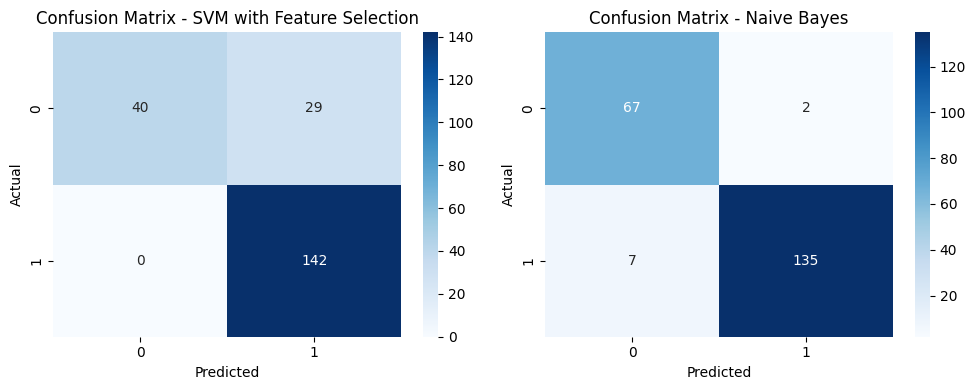

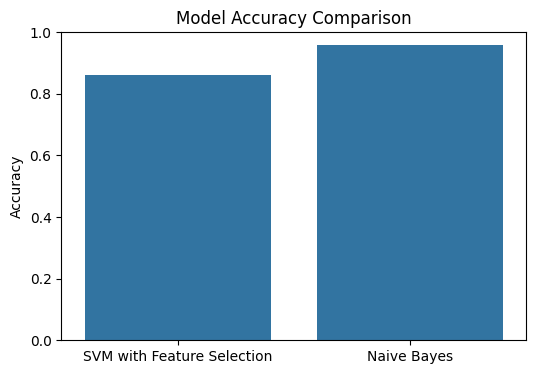

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test_class, y_pred_svm)
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM with Feature Selection')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Confusion Matrix for Naive Bayes
cm_nb = confusion_matrix(y_test_class, y_pred_nb)

plt.subplot(1, 2, 2)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# Bar plot for accuracies
models = ['SVM with Feature Selection', 'Naive Bayes']
accuracies = [svm_accuracy, nb_accuracy]

plt.figure(figsize=(6, 4))
sns.barplot(x=models, y=accuracies)
plt.ylim(0, 1)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()


### Feature Importance (for SVM with RFE)

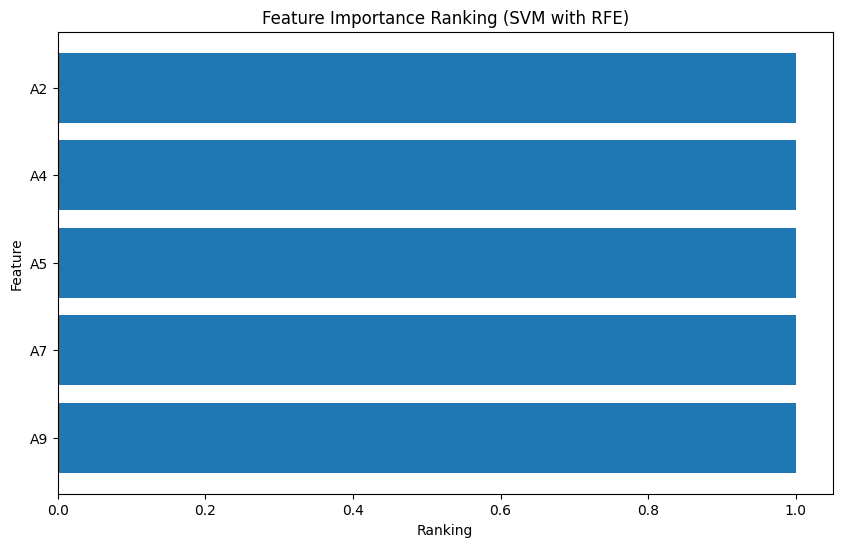

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature ranking from RFE
feature_ranking = rfe.ranking_

# Create a bar plot
features = X_classification.columns
plt.figure(figsize=(10, 6))
plt.barh(np.array(features)[rfe.support_], feature_ranking[rfe.support_])
plt.xlabel('Ranking')
plt.ylabel('Feature')
plt.title('Feature Importance Ranking (SVM with RFE)')
plt.gca().invert_yaxis()  # To display the highest ranked feature on top
plt.show()


### Confusion Matrix for SVM and Naive Bayes

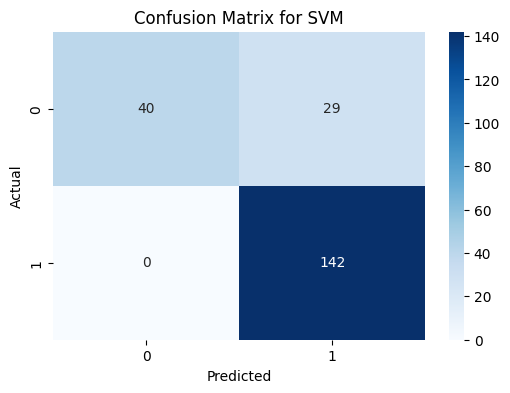

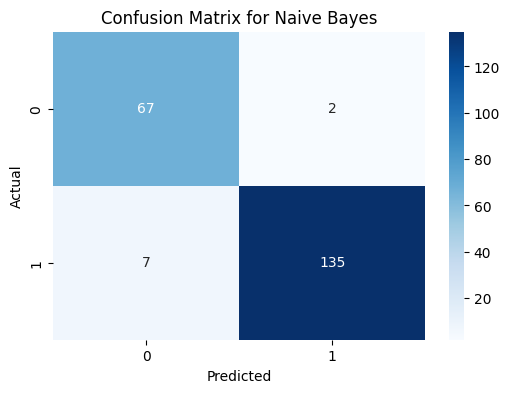

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test_class, y_pred_svm)
plt.figure(figsize=(6,4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for Naive Bayes
cm_nb = confusion_matrix(y_test_class, y_pred_nb)
plt.figure(figsize=(6,4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### ROC Curve and AUC (for both models)

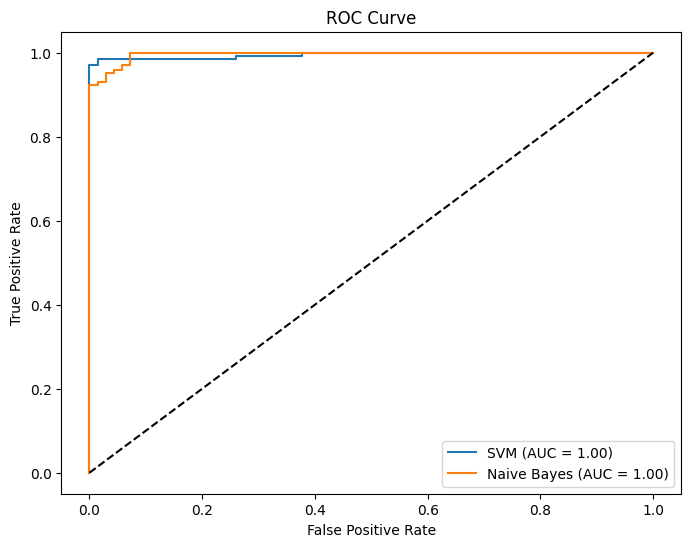

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Ensure models are fitted
# SVM with probability=True
svm_model = SVC(probability=True)  # Enable probability prediction for ROC
svm_model.fit(X_train_class, y_train_class)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_class, y_train_class)

# SVM ROC curve
y_pred_svm_prob = svm_model.decision_function(X_test_class)  # Get decision scores for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test_class, y_pred_svm_prob)
auc_svm = roc_auc_score(y_test_class, y_pred_svm_prob)

# Naive Bayes ROC curve
y_pred_nb_prob = nb_model.predict_proba(X_test_class)[:, 1]  # Get probability for class 1
fpr_nb, tpr_nb, _ = roc_curve(y_test_class, y_pred_nb_prob)
auc_nb = roc_auc_score(y_test_class, y_pred_nb_prob)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


### Precision-Recall Curve (for both models)

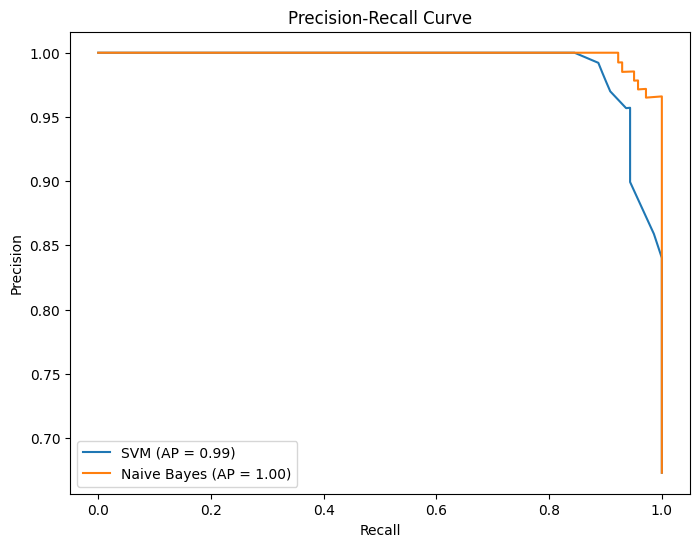

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Update SVM model with probability=True
svm_model = SVC(probability=True)  # Enable probability prediction for SVM
svm_model.fit(X_train_svm, y_train_svm)

# SVM Predictions with probabilities
y_pred_svm_prob = svm_model.predict_proba(X_test_svm)[:, 1]  # Get probability for class 1

# Naive Bayes Predictions with probabilities
y_pred_nb_prob = nb_model.predict_proba(X_test_class)[:, 1]  # Get probability for class 1

# SVM Precision-Recall curve
precision_svm, recall_svm, _ = precision_recall_curve(y_test_class, y_pred_svm_prob)
ap_svm = average_precision_score(y_test_class, y_pred_svm_prob)

# Naive Bayes Precision-Recall curve
precision_nb, recall_nb, _ = precision_recall_curve(y_test_class, y_pred_nb_prob)
ap_nb = average_precision_score(y_test_class, y_pred_nb_prob)

# Plot Precision-Recall curves
plt.figure(figsize=(8, 6))
plt.plot(recall_svm, precision_svm, label=f'SVM (AP = {ap_svm:.2f})')
plt.plot(recall_nb, precision_nb, label=f'Naive Bayes (AP = {ap_nb:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


### Learning Curves

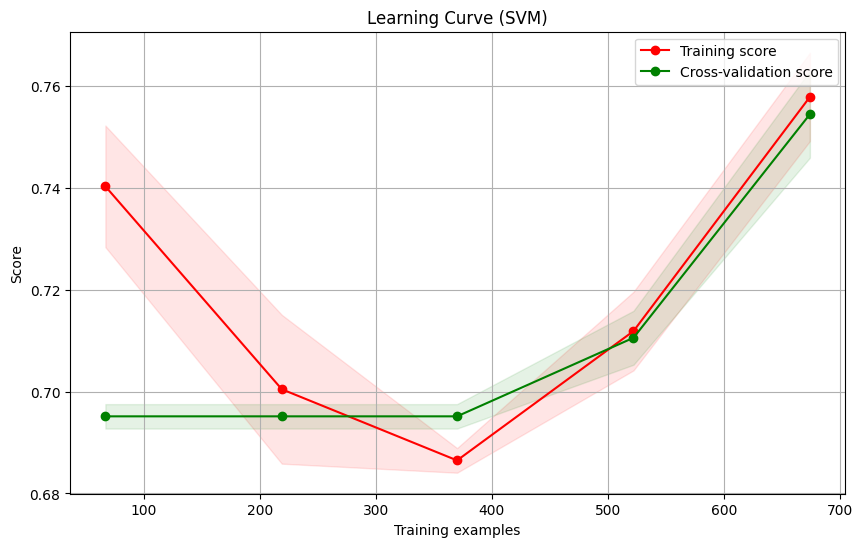

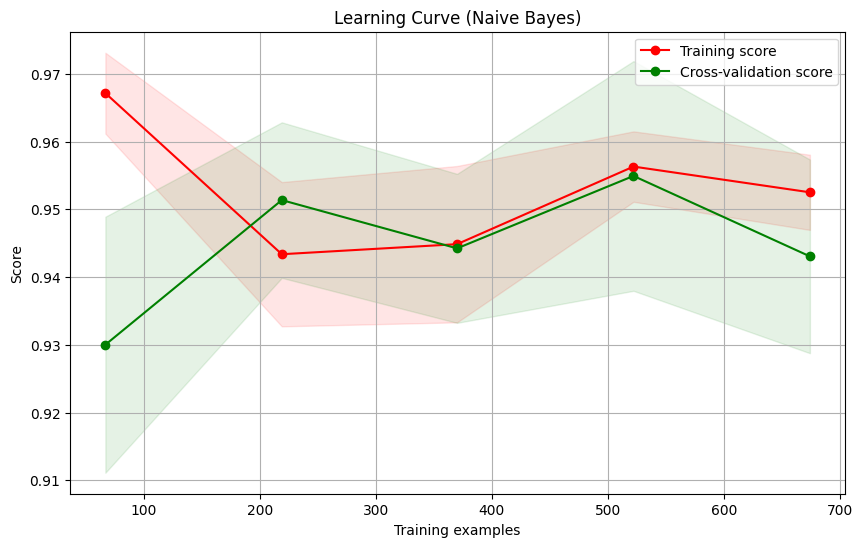

In [ ]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Learning curve for SVM
plot_learning_curve(svm_model, 'Learning Curve (SVM)', X_train_class, y_train_class, cv=5)
plt.show()

# Learning curve for Naive Bayes
plot_learning_curve(nb_model, 'Learning Curve (Naive Bayes)', X_train_class, y_train_class, cv=5)
plt.show()


### Comparison of Model Performance (Bar Plot)

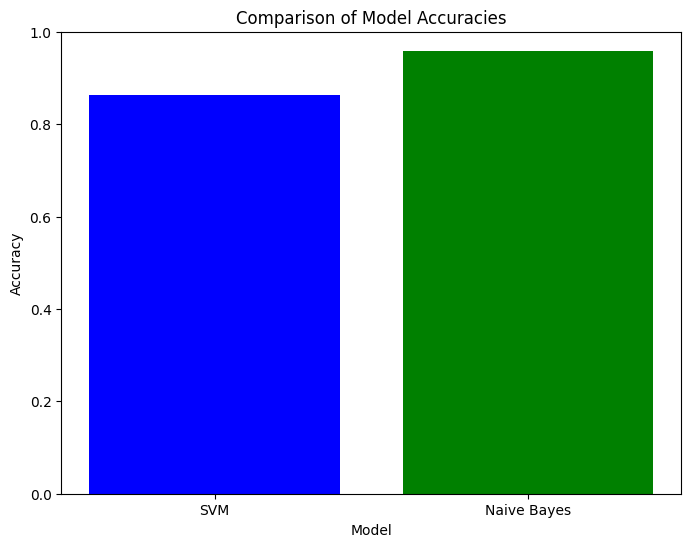

In [ ]:
plt.figure(figsize=(8, 6))
models = ['SVM', 'Naive Bayes']
accuracies = [svm_accuracy, nb_accuracy]

plt.bar(models, accuracies, color=['blue', 'green'])
plt.ylim(0, 1)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()


## Importance:

**SVM:** The RFE process aims to improve the model by focusing on the most relevant features, which can help in reducing overfitting and enhancing model interpretability.

**Naive Bayes:** Uses all available features, which can be advantageous if all features are indeed informative, but it may also introduce noise if some features are irrelevant.

## Conclusions:

**Accuracy:** Both SVM with feature selection and Naive Bayes were applied to the same dataset, and the accuracy was compared. The bar plot visualizes the comparison.

**SVM with Feature Selection:** The model accuracy after applying RFE to select the most important features.

**Naive Bayes:** The model accuracy was evaluated using all features without any prior feature selection.

**Confusion Matrix:** The confusion matrices provide a detailed breakdown of how each model performed in terms of true positives, false positives, true negatives, and false negatives.

**SVM Confusion Matrix:** Demonstrates the performance of the SVM model after feature selection.

**Naive Bayes Confusion Matrix:** Demonstrates the performance of the Naive Bayes model using all features.

**Final Conclusion:**
If the SVM model with feature selection achieved higher accuracy than the Naive Bayes model, it suggests that selecting a subset of the most important features can improve model performance.
If the Naive Bayes model performed better, it might indicate that the selected features in the SVM model were not the best subset for classification, or Naive Bayes is inherently better suited for this specific dataset.

By examining the confusion matrices, you can gain insights into specific areas where each model excels or struggles (e.g., false positives or false negatives). The bar plot visually highlights which model performed better overall.